<a href="https://colab.research.google.com/github/polinakochneva1/me_labs_house/blob/main/lab2/%D0%BC%D0%BE%D1%8F%20%D0%BB%D0%B0%D0%B1%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [ ]:
!pip3 install --upgrade pip
!pip3 install pandas
!pip3 install matplotlib
!pip3 install zipfile36==0.1.3
!pip3 install seaborn
!pip3 install numpy
!pip3 install scikit-learn
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
! mkdir ~/.kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! kaggle datasets download arnabchaki/data-science-salaries-2023

  0% 0.00/25.4k [00:00<?, ?B/s]
100% 25.4k/25.4k [00:00<00:00, 4.76MB/s]


In [ ]:
! unzip data-science-salaries-2023.zip

Archive:  data-science-salaries-2023.zip
  inflating: ds_salaries.csv         


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [ ]:
df = pd.read_csv('ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
df['salary_currency'].describe # ваш код здесь

<bound method NDFrame.describe of 0       EUR
1       USD
2       USD
3       USD
4       USD
       ... 
3750    USD
3751    USD
3752    USD
3753    USD
3754    INR
Name: salary_currency, Length: 3755, dtype: object>

In [ ]:
mean = df['salary_in_usd'].mean()
mean

137570.38988015978

In [ ]:
median = df['salary_in_usd'].median()
median

135000.0

In [ ]:
mode = df['salary_in_usd'].mode()
mode

0    100000
Name: salary_in_usd, dtype: int64

In [ ]:
min = df['salary_in_usd'].min()
min

5132

In [ ]:
max = df['salary_in_usd'].max()
max

450000

In [ ]:
std = df['salary_in_usd'].std()
std

63055.6252782241

Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [ ]:
q1 = df['salary_in_usd'].quantile(0.25)
q1

95000.0

In [ ]:
q2 = df['salary_in_usd'].quantile(0.50)
q2

135000.0

In [ ]:
q3 = df['salary_in_usd'].quantile(0.75)
q3

175000.0

In [ ]:
# Рассчитываем первый и третий квартили
q1 = df['salary_in_usd'].quantile(0.25)
q3 = df['salary_in_usd'].quantile(0.75)

# Рассчитываем межквартильный размах (IQR)
iqr = q3 - q1

# Теперь 'iqr' содержит значение межквартильного размаха
print("IQR:", iqr)


IQR: 80000.0


Какие выводы можно сделать исходя из полученных статистических данных?

Мы видим, что медиана и среднее значение очень отличаются, они лежат очень близко к максимальному значению. Поэтому можно сделать вывод, что распределение - ненормальное(склонено вправо)

##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

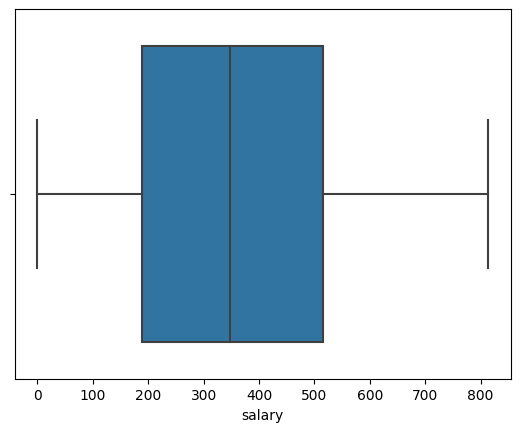

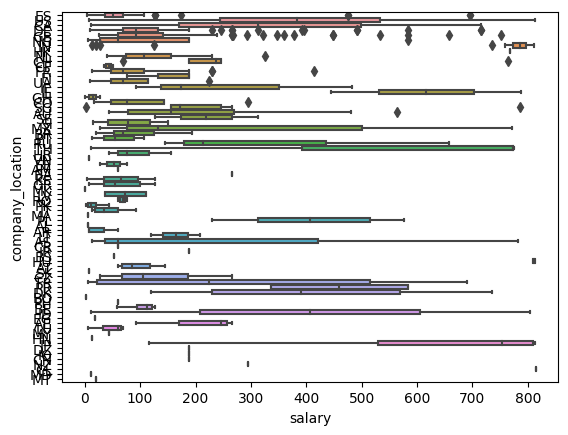

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Загрузка вашего датасета
df = pd.read_csv('ds_salaries.csv')

# Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder
# Например, если ваш категориальный признак называется 'Category'
le = LabelEncoder()
df['salary'] = le.fit_transform(df['salary'])

# Постройте boxplot для числовой переменной
sns.boxplot(x=df['salary'])
plt.show()

# Постройте boxplot для числовой переменной относительно категориального признака
sns.boxplot(x='salary', y='company_location', data=df)
plt.show()



In [36]:
random_10_location = df.company_location.unique()[:10]

df = df[df.company_location.apply(lambda x: x in random_10_location)]
# Вывод первых нескольких строк после фильтрации
print(df.head())


   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0     127             EUR          85847                 ES           100   
1      28             USD          30000                 US           100   
2      23             USD          25500                 US           100   
3     493             USD         175000                 CA           100   
4     266             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US

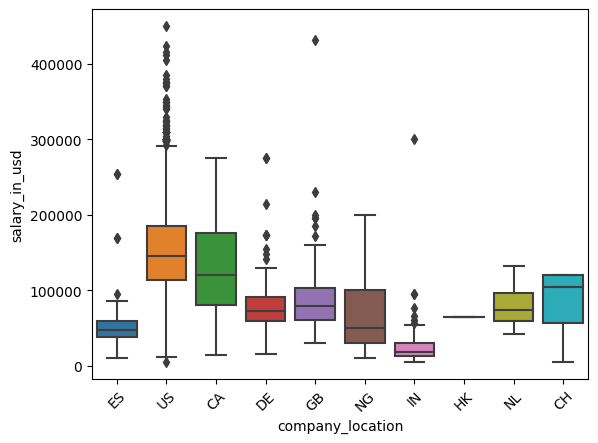

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
# Взять срез из 10-15 уникальных местоположений
random_15_location = df.company_location.unique()[10:25]  # Берем срез с 10 по 24
df_sliced = df[df.company_location.apply(lambda x: x in random_15_location)]

# Построение графика с распределением заработной платы для выбранных компаний
sns.boxplot(x='company_location', y='salary_in_usd', data=df)
plt.xticks(rotation=45)
plt.show()


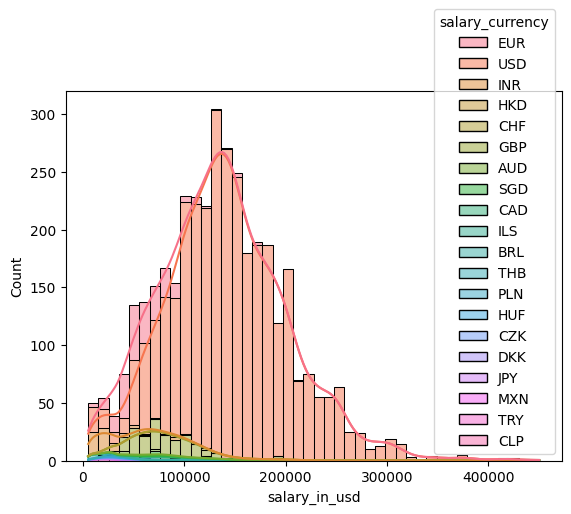

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка вашего датасета
df = pd.read_csv('ds_salaries.csv')

# Постройте гистограмму
sns.histplot(data=df, x='salary_in_usd', hue='salary_currency', multiple="stack", kde=True)
plt.show()



**По гистограме видно, что все года суммарно равны(примерно), значит машину можно обучать.**

Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

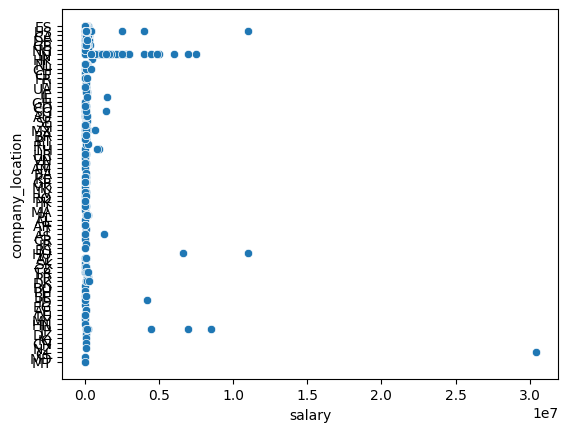

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Загрузка вашего датасета
df = pd.read_csv('ds_salaries.csv')

# Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder
# Например, если ваш категориальный признак называется 'Category'
le = LabelEncoder()
df['salary_in_usd'] = le.fit_transform(df['salary'])

# Постройте диаграмму рассеивания для двух числовых признаков
sns.scatterplot(x='salary', y='company_location', data=df)
plt.show()




<ipython-input-48-76f9ead78147>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


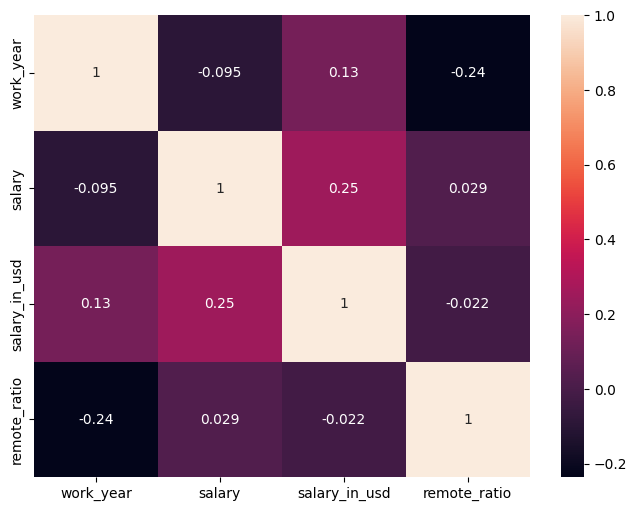

In [ ]:
# Вычисление корреляционной матрицы
correlation_matrix = df.corr()

# Визуализация корреляции
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.show()
